In [1]:
import os; os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 

/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local/fastai-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!pip freeze|grep fast

fastai==2.7.10
fastcore==1.5.27
fastdownload==0.0.7
fastjsonschema==2.16.2
fastprogress==1.0.3


In [4]:
# uncomment this if the dataset is downloaded for the first time in your machine
# path = untar_data(URLs.PETS)
# path = path/'images'

In [5]:
path = Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images')

In [6]:
path.ls()

(#7393) [Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

In [7]:
mps_device = torch.device("mps")
# mps_device = torch.device("cpu")

In [8]:
# path.to(mps_device)

In [9]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))#,
    # device=mps_device)

In [10]:
# ??get_image_files

In [11]:
# dls.device = mps_device

In [12]:
dls.device

device(type='cpu')

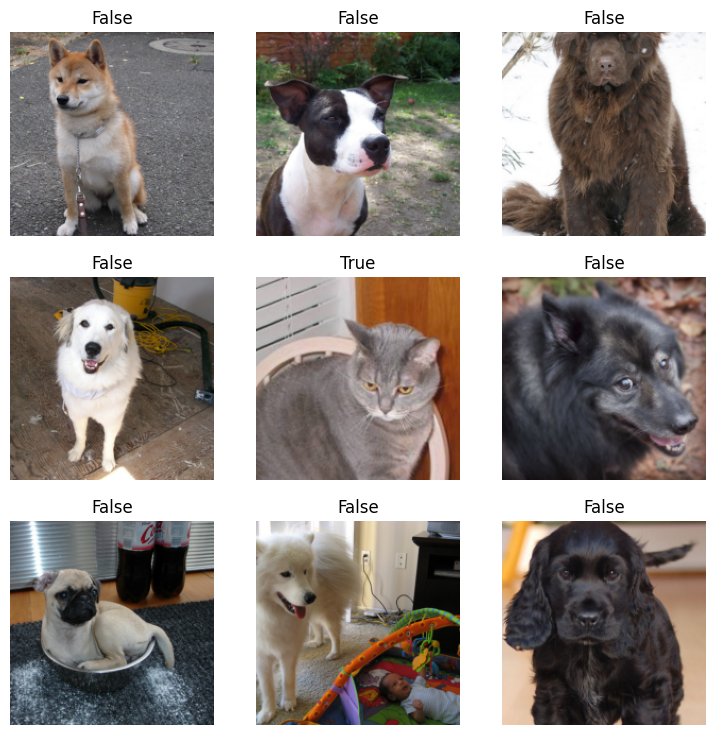

In [13]:
dls.show_batch()

In [14]:
import os; print(os.environ)

environ({'TERM_SESSION_ID': 'w0t0p0:777196CA-AE8E-4CCD-A01B-21DDF78F9A61', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.B9VBBgKQwC/Listeners', 'LC_TERMINAL_VERSION': '3.4.15', 'COLORFGBG': '7;0', 'ITERM_PROFILE': 'Default', 'XPC_FLAGS': '0x0', 'PWD': '/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local', 'SHELL': '/bin/zsh', '__CFBundleIdentifier': 'com.googlecode.iterm2', 'SECURITYSESSIONID': '186a5', 'LC_CTYPE': 'UTF-8', 'TERM_PROGRAM_VERSION': '3.4.15', 'TERM_PROGRAM': 'iTerm.app', 'PATH': '/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local/fastai-venv/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/homebrew/bin', 'LC_TERMINAL': 'iTerm2', 'COLORTERM': 'truecolor', 'COMMAND_MODE': 'unix2003', 'TERM': 'xterm-color', 'HOME': '/Users/muniyarajs', 'TMPDIR': '/var/folders/cn/ll75z8d518j72zm_n0j8pq0w0000gn/T/', 'USER': 'muniyarajs', 'XPC_SERVICE_NAME': '0', 'LOGNAME': 'muniyarajs', 'LaunchInstanceID': '9A7B5E03-0D44-4AE5-BBCB-0

In [15]:
# ??vision_learner

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
# learn.to(mps_device) -- didnt work
# setting mps as device works only if it is set here below after the learner is created.
# If it is set before creating learner or passed as device argument while creating the ImageDataLoader, it always error out as tensors are in both mpu and cpu
dls.device = mps_device
learn.fine_tune(3)

/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local/fastai-venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/muniyarajs/projects/learning/fastai/git/fastai-dl-local/fastai-venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.203517,0.060167,0.023004,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.081601,0.030185,0.010149,00:57
1,0.043164,0.032254,0.010825,00:57
2,0.021555,0.029783,0.008796,00:57


In [17]:
files = get_image_files(path)
len(files)



7390

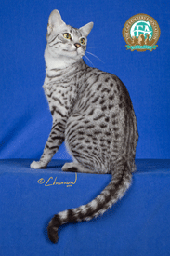

In [18]:
Image.open(files[0]).to_thumb(256,256)

In [19]:

print(f'{files[0]} is predicted as {learn.predict(files[0])}')

for i in range(10):
  print(f'{files[i]} is predicted as {learn.predict(files[i])}')

/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg is predicted as ('True', TensorBase(1), TensorBase([2.6648e-10, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg is predicted as ('True', TensorBase(1), TensorBase([2.6648e-10, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/pug_52.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 2.5814e-06]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 1.2269e-06]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg is predicted as ('True', TensorBase(1), TensorBase([1.3368e-09, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.4559e-06]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg is predicted as ('True', TensorBase(1), TensorBase([4.4067e-13, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg is predicted as ('True', TensorBase(1), TensorBase([4.6495e-09, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 1.1110e-05]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg is predicted as ('True', TensorBase(1), TensorBase([4.4875e-14, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.5441e-08]))


In [20]:
#export model
learn.export('cat_model.pkl')

In [21]:
learn_inf = load_learner('cat_model.pkl')

for i in range(10):
  print(f'{files[i]} is predicted as {learn_inf.predict(files[i])}')

/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg is predicted as ('True', TensorBase(1), TensorBase([2.9788e-07, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/pug_52.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9917e-01, 8.2963e-04]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg is predicted as ('False', TensorBase(0), TensorBase([0.9974, 0.0026]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg is predicted as ('True', TensorBase(1), TensorBase([8.4578e-07, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9939e-01, 6.0651e-04]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg is predicted as ('True', TensorBase(1), TensorBase([1.0394e-09, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg is predicted as ('True', TensorBase(1), TensorBase([4.2879e-06, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg is predicted as ('False', TensorBase(0), TensorBase([0.9889, 0.0111]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg is predicted as ('True', TensorBase(1), TensorBase([3.2479e-10, 1.0000e+00]))


/Users/muniyarajs/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9950e-01, 5.0021e-04]))
